In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

data = iris.data
feature_names = iris.feature_names
y = iris.target

df = pd.DataFrame(data,columns = feature_names)
df["sinif"] = y

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sinif
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df["sinif"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: sinif, Length: 150, dtype: int64

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, whiten= True )  # whitten = normalize
pca.fit(data)

PCA(n_components=2, whiten=True)

In [7]:
data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [8]:
data_pca = pca.transform(data)

print("variance ratio: ", pca.explained_variance_ratio_)

print("sum: ",sum(pca.explained_variance_ratio_))

variance ratio:  [0.92461872 0.05306648]
sum:  0.977685206318795


In [9]:
data_pca[:10]

array([[-1.30533786,  0.64836932],
       [-1.31993521, -0.35930856],
       [-1.40496732, -0.29424412],
       [-1.33510889, -0.64613986],
       [-1.32702321,  0.6633044 ],
       [-1.10922246,  1.50488434],
       [-1.3716775 , -0.18160462],
       [-1.27714084,  0.33166784],
       [-1.40369908, -1.17396001],
       [-1.29980851, -0.23095919]])

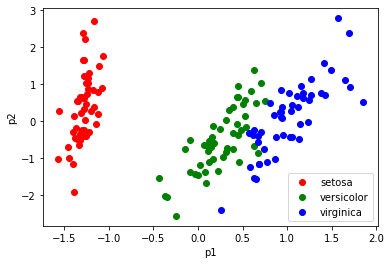

In [11]:
df["p1"] = data_pca[:,0]
df["p2"] = data_pca[:,1]

color = ["red","green","blue"]

import matplotlib.pyplot as plt
for each in range(3):
    plt.scatter(df.p1[df.sinif == each],df.p2[df.sinif == each],color = color[each],label = iris.target_names[each])
    
plt.legend()
plt.xlabel("p1")
plt.ylabel("p2")
plt.show()

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sinif,p1,p2
0,5.1,3.5,1.4,0.2,0,-1.305338,0.648369
1,4.9,3.0,1.4,0.2,0,-1.319935,-0.359309
2,4.7,3.2,1.3,0.2,0,-1.404967,-0.294244
3,4.6,3.1,1.5,0.2,0,-1.335109,-0.646140
4,5.0,3.6,1.4,0.2,0,-1.327023,0.663304


In [14]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
#Standardize Data

x = df.loc[:, feature_names].values

y = df.loc[:,['sinif']].values

x = StandardScaler().fit_transform(x)

pd.DataFrame(data = x, columns = feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [17]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [18]:
principalComponents[:10]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356]])

In [20]:
df["principal component 1"] = principalComponents[:,0]
df["principal component 2"] = principalComponents[:,1]

In [21]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sinif,p1,p2,principal component 1,principal component 2
0,5.1,3.5,1.4,0.2,0,-1.305338,0.648369,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,0,-1.319935,-0.359309,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,0,-1.404967,-0.294244,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,0,-1.335109,-0.646140,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,0,-1.327023,0.663304,-2.389842,0.646835
